In [15]:
import pandas as pd

# Membaca dataset
dataset = pd.read_csv('transaction.csv')

# Tampilkan dataset
dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


In [26]:
# Menghitung kemunculan tiap negara
country = dataset['Country'].value_counts()

# Menampilkan hasil
print("\nJumlah transaksi tiap negara:")
print(country)


Jumlah transaksi tiap negara:
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Republ

In [27]:
# Menghitung banyaknya transaksi pada tiap negara
transaksi = dataset.groupby('Country')['InvoiceNo'].nunique()

# Menampilkan hasil
print("\nBanyaknya transaksi pada tiap negara:")
print(transaksi)


Banyaknya transaksi pada tiap negara:
Country
Australia                44
Austria                  12
Bahrain                   1
Belgium                  84
Brazil                    1
Canada                    3
Channel Islands          21
Cyprus                   16
Czech Republic            2
Denmark                  18
EIRE                    224
European Community        3
Finland                  26
France                  344
Germany                 377
Greece                    5
Iceland                   6
Israel                    4
Italy                    31
Japan                    14
Lebanon                   1
Lithuania                 2
Malta                     2
Netherlands              76
Norway                   28
Poland                   17
Portugal                 43
RSA                       1
Saudi Arabia              1
Singapore                 4
Spain                    72
Sweden                   26
Switzerland              41
USA                       5
U

In [29]:
from sklearn.cluster import AgglomerativeClustering

# Melakukan clustering dengan Average Linkage
k = 3
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average').fit(transaksi.values.reshape(-1, 1))

In [35]:
import numpy as np

# Menghitung posisi centroid dari setiap cluster
centroids = []
for i in range(k):
    cluster_points = np.where(cluster.labels_ == i)[0]
    centroid = np.mean(transaksi.iloc[cluster_points])
    centroids.append(centroid)

print(centroids)

[18.78787878787879, 360.5, 224.0]


In [36]:
# Mengurutkan posisi centroid secara ascending
sorted_centroids = sorted(centroids)

# Menampilkan posisi centroid yang sudah diurutkan
print("\nPosisi centroid setelah diurutkan:")
print(sorted_centroids)


Posisi centroid setelah diurutkan:
[18.78787878787879, 224.0, 360.5]


In [25]:
# Menentukan cluster transaksi rendah, sedang, dan tinggi
low_cluster = np.where(cluster.labels_ == centroids.index(sorted_centroids[0]))[0]
medium_cluster = np.where(cluster.labels_ == centroids.index(sorted_centroids[1]))[0]
high_cluster = np.where(cluster.labels_ == centroids.index(sorted_centroids[2]))[0]

# Menampilkan negara pada masing-masing cluster
negara_rendah = transaksi.index[low_cluster]
negara_sedang = transaksi.index[medium_cluster]
negara_tinggi = transaksi.index[high_cluster]

print(negara_rendah)
print(negara_sedang)
print(negara_tinggi)

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark',
       'European Community', 'Finland', 'Greece', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain',
       'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'Unspecified'],
      dtype='object', name='Country')
Index(['EIRE'], dtype='object', name='Country')
Index(['France', 'Germany'], dtype='object', name='Country')


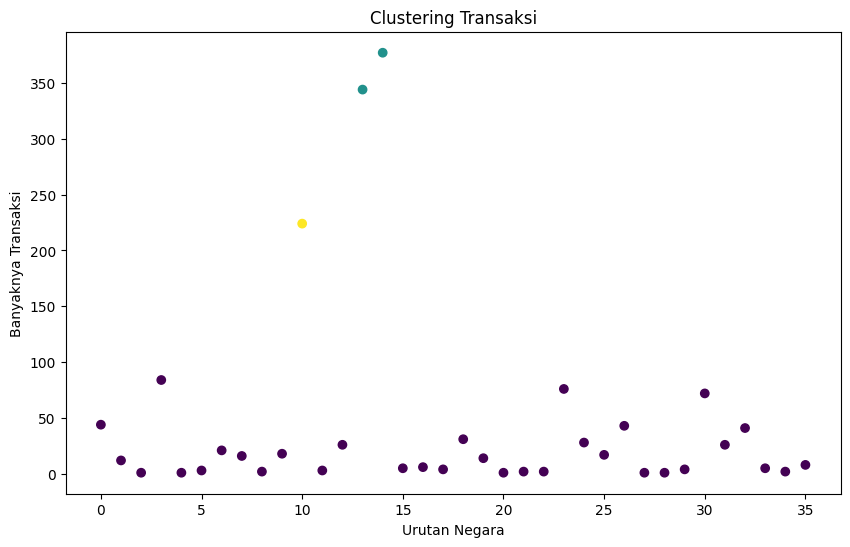

In [22]:
import matplotlib.pyplot as plt

# Visualisasi hasil cluster
plt.figure(figsize=(10, 6))
plt.scatter(range(len(transaksi)), transaksi.values, c=cluster.labels_, cmap='viridis')
plt.xlabel('Urutan Negara')
plt.ylabel('Banyaknya Transaksi')
plt.title('Clustering Transaksi')
plt.show()